# Data 파악

In [1]:
import pandas as pd
import numpy as np
import random
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_interactions = pd.read_csv('RAW_interactions.csv')

In [3]:
review_rating = raw_interactions[['review', 'rating']]

In [4]:
review_rating.head()

,review,rating
0,Great with a salad. Cooked on top of stove for...,4
1,"So simple, so delicious! Great for chilly fall...",5
2,This worked very well and is EASY. I used not...,4
3,I made the Mexican topping and took it to bunk...,5
4,"Made the cheddar bacon topping, adding a sprin...",5


# review data info

In [5]:
review_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 2 columns):
review    1132198 non-null object
rating    1132367 non-null int64
dtypes: int64(1), object(1)
memory usage: 17.3+ MB


In [6]:
review_rating.isnull().sum()

review    169
rating      0
dtype: int64

# review_rating data have null data in 169 review

In [7]:
review_rating = review_rating[review_rating.review.notnull()]

In [8]:
review_rating.rating.value_counts()

5    816229
4    187333
0     60847
3     40852
2     14122
1     12815
Name: rating, dtype: int64

# review_rating data have 0 in 60847 rating

In [9]:
review_rating = review_rating[review_rating.rating != 0]

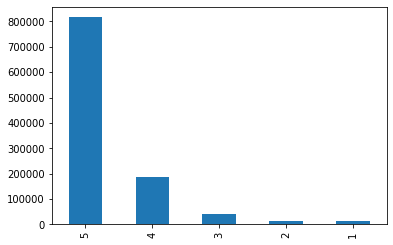

In [10]:
review_rating.rating.value_counts().plot(kind='bar')

In [11]:
temp = review_rating[review_rating.rating == 5]
review_rating = review_rating[review_rating.rating != 5]

In [12]:
len(temp)

816229

In [13]:
rating_4_num = len(review_rating[review_rating.rating == 4])

In [14]:
temp

,review,rating
1,"So simple, so delicious! Great for chilly fall...",5
3,I made the Mexican topping and took it to bunk...,5
4,"Made the cheddar bacon topping, adding a sprin...",5
9,Better than the real!!,5
10,Absolutely AWESOME! I was speechless when I tr...,5
...,...,...
1132359,This is the best and easiest hot fudge ever. I...,5
1132360,Delicious quick thick chocolate sauce with ing...,5
1132363,These were so delicious! My husband and I tru...,5
1132364,WOW! Sometimes I don't take the time to rate ...,5


In [15]:
temp = random.sample(temp.values.tolist(), rating_4_num)

In [16]:
temp = pd.DataFrame(temp, columns=['review', 'rating'])

In [17]:
review_rating = pd.concat([review_rating, temp])

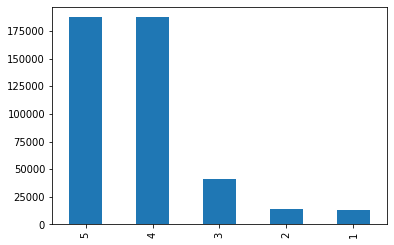

In [18]:
review_rating.rating.value_counts().plot(kind='bar')

In [19]:
review_rating

,review,rating
0,Great with a salad. Cooked on top of stove for...,4
2,This worked very well and is EASY. I used not...,4
5,very very sweet. after i waited the 2 days i b...,4
7,This recipe was OVERLY too sweet. I would sta...,2
8,Very good!,4
...,...,...
187328,Very nice recipe. Love the slight tartness fr...,5
187329,Eggplant is my favorite &quot;new&quot; ingred...,5
187330,I completely agree with this recipe's title......,5
187331,First time I had this was at my daughter's wed...,5


In [20]:
X_data = review_rating['review']
y_data = review_rating['rating']
print('review 개수: {}'.format(len(X_data)))
print('rating개수: {}'.format(len(y_data)))

review 개수: 442455
rating개수: 442455


In [21]:
normalized_text = []
for string in X_data.tolist():
    try:
        tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    except Exception as e:
        print(string)
        break
    normalized_text.append(tokens)

In [22]:
normalized_text[:5]

['great with a salad cooked on top of stove for 15 minutes added a shake of cayenne and a pinch of salt used low fat sour cream thanks ',
 'this worked very well and is easy i used not quite a whole package 10oz of white chips great ',
 'very very sweet after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix i m going to add some as a cake filling today and will take a photo ',
 'this recipe was overly too sweet i would start out with 1 3 or 1 4 cup of sugar and jsut add on from there just 2 cups was way too much and i had to go back to the grocery store to buy more raspberries because it made so much mix overall i would but the long narrow box or raspberries its a perfect fit for the recipe plus a little extra i was not impressed with this recipe it was exceptionally over sweet if you make this simple recipe make sure to add less sugar ',
 'very good ']

In [23]:
t = Tokenizer()
t.fit_on_texts(normalized_text)
X_encoded = t.texts_to_sequences(normalized_text)
vocab_size = len(t.word_index) + 1

print(X_encoded[:3])

[[30, 13, 4, 176, 135, 27, 157, 9, 822, 8, 481, 113, 42, 4, 1842, 9, 578, 3, 4, 936, 9, 137, 20, 270, 237, 306, 105, 26], [7, 280, 22, 89, 3, 16, 44, 1, 20, 29, 194, 4, 177, 1059, 5555, 9, 259, 333, 30], [22, 22, 110, 125, 1, 2465, 2, 60, 721, 1, 602, 60, 49, 3519, 9, 1591, 3, 42, 40, 6, 2, 187, 1, 109, 269, 6, 68, 45, 24, 4, 142, 273, 463, 3, 35, 380, 4, 753]]


In [24]:
n_of_train = int(len(X_data) * 0.8)
n_of_test = int(len(X_data) - n_of_train)
print(n_of_train)
print(n_of_test)

353964
88491


리뷰의 최대 길이 : 6972
리뷰의 평균 길이 : 284.464169


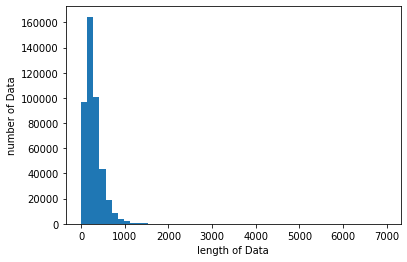

In [25]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in X_data))
print('리뷰의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [26]:
max_len = 1308
data = pad_sequences(X_encoded, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (442455, 1308)


In [27]:
X_test = data[n_of_train:] 
y_test = np.array(y_data[n_of_train:]) 
X_train = data[:n_of_train] 
y_train = np.array(y_data[:n_of_train]) 

In [28]:
print(X_train[:3])
print(y_train[:3])

[[  0   0   0 ... 306 105  26]
 [  0   0   0 ... 259 333  30]
 [  0   0   0 ... 380   4 753]]
[4 4 4]


# GloVe

In [29]:
n=0
f = open('C:\\Users\\user\\Documents\\GitHub\\grad_project\\recipe_rating\\preprocessing\\glove.6B\\glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split() # 각 줄을 읽어와서 word_vector에 저장.
    print(word_vector) # 각 줄을 출력
    word = word_vector[0] # word_vector에서 첫번째 값만 저장
    print(word) # word_vector의 첫번째 값만 출력
    n=n+1
    if n==2:
        break
f.close()

['the', '-0.038194', '-0.24487', '0.72812', '-0.39961', '0.083172', '0.043953', '-0.39141', '0.3344', '-0.57545', '0.087459', '0.28787', '-0.06731', '0.30906', '-0.26384', '-0.13231', '-0.20757', '0.33395', '-0.33848', '-0.31743', '-0.48336', '0.1464', '-0.37304', '0.34577', '0.052041', '0.44946', '-0.46971', '0.02628', '-0.54155', '-0.15518', '-0.14107', '-0.039722', '0.28277', '0.14393', '0.23464', '-0.31021', '0.086173', '0.20397', '0.52624', '0.17164', '-0.082378', '-0.71787', '-0.41531', '0.20335', '-0.12763', '0.41367', '0.55187', '0.57908', '-0.33477', '-0.36559', '-0.54857', '-0.062892', '0.26584', '0.30205', '0.99775', '-0.80481', '-3.0243', '0.01254', '-0.36942', '2.2167', '0.72201', '-0.24978', '0.92136', '0.034514', '0.46745', '1.1079', '-0.19358', '-0.074575', '0.23353', '-0.052062', '-0.22044', '0.057162', '-0.15806', '-0.30798', '-0.41625', '0.37972', '0.15006', '-0.53212', '-0.2055', '-1.2526', '0.071624', '0.70565', '0.49744', '-0.42063', '0.26148', '-1.538', '-0.30223

In [30]:
print(type(word_vector))
print(len(word_vector))

<class 'list'>
101


In [31]:
import numpy as np
embedding_dict = dict()
f = open('C:\\Users\\user\\Documents\\GitHub\\grad_project\\recipe_rating\\preprocessing\\glove.6B\\glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [32]:
embedding_matrix = np.zeros((vocab_size, 100))
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(86775, 100)

In [33]:
for word, i in t.word_index.items(): # 훈련 데이터의 단어 집합에서 단어를 1개씩 꺼내온다.
    temp = embedding_dict.get(word) # 단어(key) 해당되는 임베딩 벡터의 100개의 값(value)를 임시 변수에 저장
    if temp is not None:
        embedding_matrix[i] = temp # 임수 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False)

# 1

In [35]:
model.add(e)
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=1)

Train on 353964 samples
Epoch 1/100
353964/353964 [==============================] - 218s 616us/sample - loss: 1.3395 - accuracy: 0.5285
Epoch 2/100
353964/353964 [==============================] - 229s 646us/sample - loss: 1.2631 - accuracy: 0.5485
Epoch 3/100
353964/353964 [==============================] - 238s 673us/sample - loss: 1.2325 - accuracy: 0.5559
Epoch 4/100
353964/353964 [==============================] - 251s 710us/sample - loss: 1.2129 - accuracy: 0.5591
Epoch 5/100
353964/353964 [==============================] - 242s 684us/sample - loss: 1.2064 - accuracy: 0.5614
Epoch 6/100
353964/353964 [==============================] - 238s 673us/sample - loss: 1.1946 - accuracy: 0.5622
Epoch 7/100
353964/353964 [==============================] - 213s 602us/sample - loss: 1.1854 - accuracy: 0.5658
Epoch 9/100
353964/353964 [==============================] - 215s 607us/sample - loss: 1.1779 - accuracy: 0.5670
Epoch 10/100
353964/353964 [==============================] - 218s 615us

# 2

In [35]:
model.add(e)
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size = 64, validation_split = 0.2)

Train on 283171 samples, validate on 70793 samples
Epoch 1/30
283171/283171 [==============================] - 162s 572us/sample - loss: 1.0983 - accuracy: 0.6398 - val_loss: 3.3917 - val_accuracy: 0.0237
Epoch 2/30
283171/283171 [==============================] - 160s 564us/sample - loss: 1.0074 - accuracy: 0.6560 - val_loss: 2.9264 - val_accuracy: 0.0630
Epoch 3/30
283171/283171 [==============================] - 161s 570us/sample - loss: 0.9818 - accuracy: 0.6615 - val_loss: 3.0004 - val_accuracy: 0.0657
Epoch 4/30
283171/283171 [==============================] - 163s 574us/sample - loss: 0.9602 - accuracy: 0.6660 - val_loss: 2.4562 - val_accuracy: 0.1701
Epoch 5/30
283171/283171 [==============================] - 163s 575us/sample - loss: 0.9543 - accuracy: 0.6673 - val_loss: 2.5458 - val_accuracy: 0.1640
Epoch 6/30
283171/283171 [==============================] - 170s 599us/sample - loss: 0.9441 - accuracy: 0.6706 - val_loss: 2.9038 - val_accuracy: 0.1184
Epoch 7/30
283171/283171 

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1308, 100)         8655200   
_________________________________________________________________
flatten (Flatten)            (None, 130800)            0         
_________________________________________________________________
dense (Dense)                (None, 6)                 784806    
Total params: 9,440,006
Trainable params: 784,806
Non-trainable params: 8,655,200
_________________________________________________________________


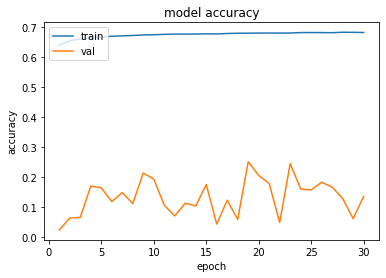

In [37]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 3

In [38]:
model.add(e)
model.add(Flatten())
model.add(Dense(units=6, activation='relu'))
model.add(Dense(64, 'relu'))
model.add(Dense(128, 'relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size = 64, validation_split = 0.2)

Train on 283171 samples, validate on 70793 samples
Epoch 1/10
    64/283171 [..............................] - ETA: 1:52:21

InvalidArgumentError:  indices[14,127504] = -1 is not in [0, 86775)
	 [[node sequential/embedding_1/embedding_lookup (defined at C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_distributed_function_2468]

Function call stack:
distributed_function


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  8677500   
_________________________________________________________________
flatten (Flatten)            (None, 130800)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 13080000)          0         
_________________________________________________________________
dense (Dense)                (None, 6)                 78480006  
_________________________________________________________________
flatten_2 (Flatten)          (None, 600)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                19232     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2